# 2. Выбрать датасет и провести его анализ

https://www.kaggle.com/usdot/flight-delays/data

In [1]:
%matplotlib inline
#графики в  Scalable Vector Graphics выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

import matplotlib.mlab as mlab
 
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

import warnings
warnings.filterwarnings("ignore")

In [2]:
flights = pd.read_csv('flights.csv')

In [3]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [4]:
corr = flights.corr()
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008874,-0.007847,-0.020746,0.000207,-0.004085,-0.021994,-0.013117,-0.004946,...,-0.010121,-0.009133,-0.036793,-0.000991,-0.055043,-0.002214,0.007925,0.011262,0.004839,-0.008682
DAY,NaN,0.008874,1.000000,0.001111,0.001855,-0.001647,-0.002644,-0.000176,-0.002661,-0.003318,...,-0.003688,-0.004310,-0.003097,0.001981,-0.003537,-0.007375,-0.000510,0.006728,0.008869,0.008882
DAY_OF_WEEK,NaN,-0.007847,0.001111,1.000000,0.014461,0.008007,0.005607,-0.011510,-0.020639,0.004060,...,0.007092,0.005641,-0.017027,-0.001442,-0.022230,-0.023674,0.001576,0.011264,-0.018026,-0.006794
FLIGHT_NUMBER,NaN,-0.020746,0.001855,0.014461,1.000000,-0.005485,-0.001444,-0.008665,0.050369,0.005289,...,-0.013947,-0.002821,0.018419,0.003802,0.037895,-0.009235,-0.007994,0.007168,0.022274,-0.002836
SCHEDULED_DEPARTURE,NaN,0.000207,-0.001647,0.008007,-0.005485,1.000000,0.963791,0.110149,0.006581,0.938008,...,0.706237,0.629342,0.100220,-0.000752,0.011752,-0.075174,-0.005068,-0.089095,0.145054,-0.013470
DEPARTURE_TIME,NaN,-0.004085,-0.002644,0.005607,-0.001444,0.963791,1.000000,0.171723,0.014002,0.971971,...,0.710223,0.648265,0.159787,0.001425,0.008055,-0.043878,-0.004682,-0.024131,0.182374,-0.004221
DEPARTURE_DELAY,NaN,-0.021994,-0.000176,-0.011510,-0.008665,0.110149,0.171723,1.000000,0.058515,0.162582,...,0.097566,0.049236,0.944672,0.022963,0.033099,0.095917,0.011877,0.621296,0.554802,0.243532
TAXI_OUT,NaN,-0.013117,-0.002661,-0.020639,0.050369,0.006581,0.014002,0.058515,1.000000,0.039104,...,0.024384,0.029745,0.227319,0.012251,0.005062,0.361659,-0.005988,-0.070290,-0.127824,0.063308
WHEELS_OFF,NaN,-0.004946,-0.003318,0.004060,0.005289,0.938008,0.971971,0.162582,0.039104,1.000000,...,0.721877,0.667991,0.155773,0.001667,0.004805,-0.026377,-0.006180,-0.032810,0.156089,-0.008338


Для наглядности построим heatmap корреляционной матрицы

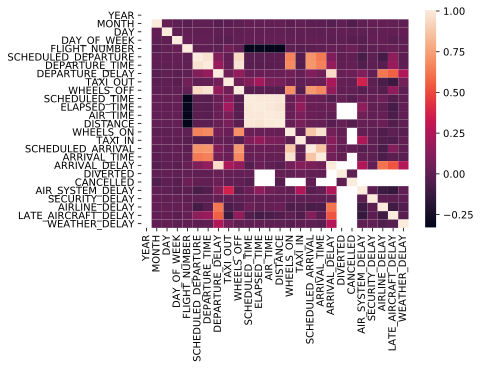

In [5]:
corr = flights.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Видно, что некоторые колонки сильно коррелируют друг с другом (например, ARRIVAL_DELAY и DEPARTURE_DELAY), поэтому использовать их вместе в регрессии нет смысла

## В какие дни недели больше рейсов

In [6]:
flights_by_wd = flights.groupby(["DAY_OF_WEEK"])["FLIGHT_NUMBER"].aggregate("count").reset_index()
flights_by_wd

,DAY_OF_WEEK,FLIGHT_NUMBER
0,1,865543
1,2,844600
2,3,855897
3,4,872521
4,5,862209
5,6,700545
6,7,817764


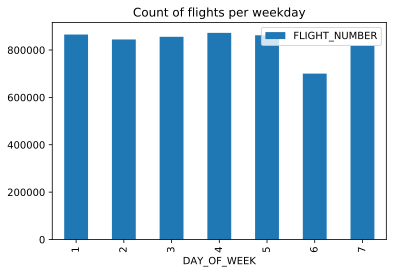

In [7]:
flights_by_wd.plot.bar(x='DAY_OF_WEEK', title='Count of flights per weekday')

Видно, что в выходные и особенно в субботу меньше полетов

## Какой процент полетов отменили?

In [8]:
flights_canceled = flights.groupby(["CANCELLED"])["FLIGHT_NUMBER"].aggregate("count").reset_index()
flights_canceled

,CANCELLED,FLIGHT_NUMBER
0,0,5729195
1,1,89884


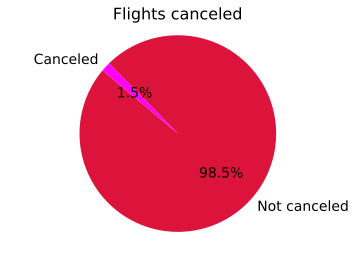

In [9]:
plt.pie(flights_canceled['FLIGHT_NUMBER'], labels=['Not canceled', 'Canceled'], 
        colors = ['crimson', 'magenta'], 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
 
plt.axis('equal')
plt.title('Flights canceled', fontsize=16)
plt.show()

## Доли отмененных рейсов по авиакомпаниям

In [10]:
flights['CANCELLED'] = flights['CANCELLED'].fillna(0)

In [11]:
flights_canceled_air = flights.groupby(["CANCELLED", "AIRLINE"])["FLIGHT_NUMBER"].aggregate("count").reset_index()
flights_canceled_air

,CANCELLED,AIRLINE,FLIGHT_NUMBER
0,0,AA,715065
1,0,AS,171852
2,0,B6,262772
3,0,DL,872057
4,0,EV,556746
5,0,F9,90248
6,0,HA,76101
7,0,MQ,279607
8,0,NK,115375
9,0,OO,578393


In [12]:
flights_canceled_air = flights_canceled_air.pivot("AIRLINE", "CANCELLED")
flights_canceled_air

FLIGHT_NUMBER       
CANCELLED             0      1
AIRLINE                       
AA               715065  10919
AS               171852    669
B6               262772   4276
DL               872057   3824
EV               556746  15231
F9                90248    588
HA                76101    171
MQ               279607  15025
NK               115375   2004
OO               578393   9960
UA               509150   6573
US               194648   4067
VX                61369    534
WN              1245812  16043

In [13]:
flights_canceled_air.columns

MultiIndex(levels=[['FLIGHT_NUMBER'], [0, 1]],
           labels=[[0, 0], [0, 1]],
           names=[None, 'CANCELLED'])

In [14]:
flights_total = flights_canceled_air['FLIGHT_NUMBER'][0]+flights_canceled_air['FLIGHT_NUMBER'][1]
percent_canceled = flights_canceled_air['FLIGHT_NUMBER'][0]/flights_total

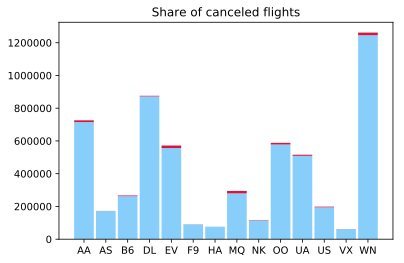

In [15]:
ind = np.arange(14)   
width = 0.9

p1 = plt.bar(flights_canceled_air.index, flights_canceled_air['FLIGHT_NUMBER'][0], width, color='lightskyblue')
p2 = plt.bar(flights_canceled_air.index, flights_canceled_air['FLIGHT_NUMBER'][1], width,
             bottom=flights_canceled_air['FLIGHT_NUMBER'][0], color='crimson')

plt.title('Share of canceled flights')
plt.show()

## Аэропорты на карте

In [16]:
airports = pd.read_csv('airports.csv')

In [17]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [18]:
#для установки folium
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

In [19]:
us_map = folium.Map(location=[48, -102], zoom_start=3)

In [20]:
airports = airports.fillna(0)

In [21]:
locations = airports[['LATITUDE', 'LONGITUDE']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[40.978120000000004, -124.10862]

In [22]:
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=airports['IATA_CODE'][point]).add_to(us_map)
us_map